# 1. How are coefficient affected?

In [34]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes, make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [6]:
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

age       sex       bmi        bp        s1        s2        s3        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401 -0.002592  0.019907 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412 -0.039493 -0.068332 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356 -0.002592  0.002861 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038  0.034309  0.022688 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142 -0.002592 -0.031988 -0.046641   135.0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=2)

In [10]:
coefs = []
r2_scores = []

for i in [0,0.1,1,10]:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

Text(0.5, 1.0, 'Alpha=10, r2_score: -0.01')

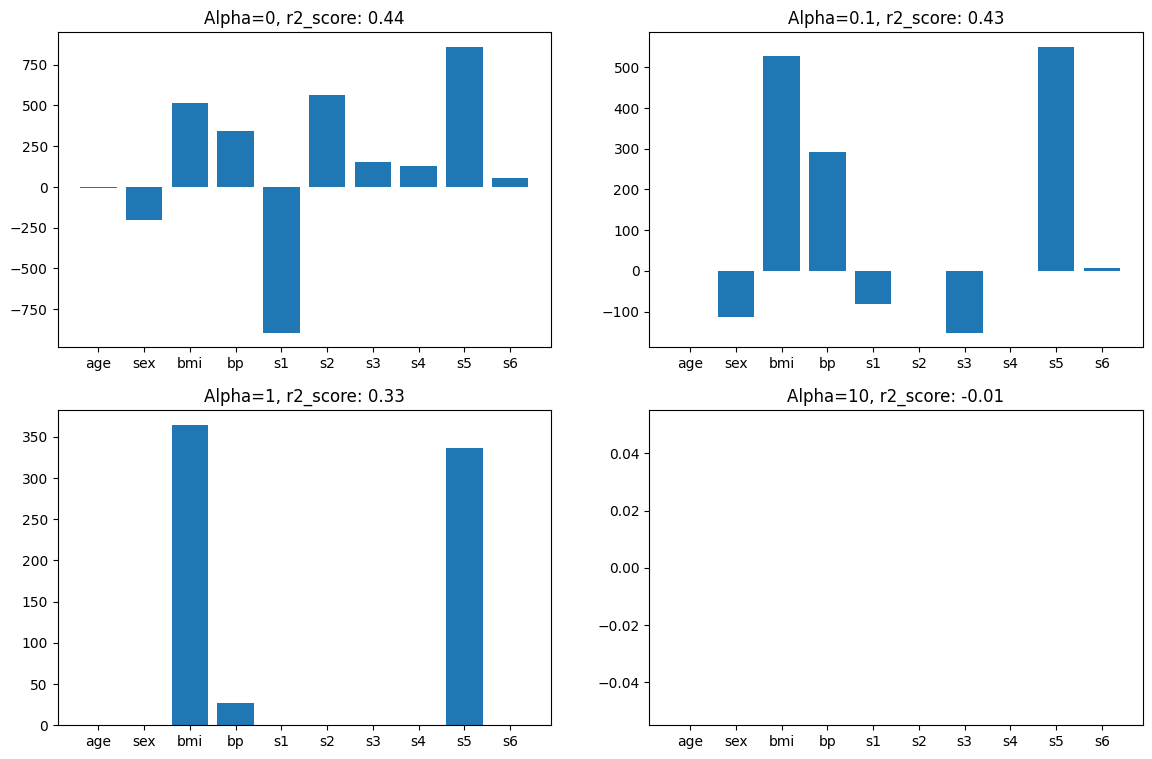

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title('Alpha=0, r2_score: {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title('Alpha=0.1, r2_score: {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title('Alpha=1, r2_score: {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title('Alpha=10, r2_score: {}'.format(round(r2_scores[3],2)))

# 2. Higher coefficient are affected more

In [15]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

In [16]:
input_array = np.array(coefs)

coef_df = pd.DataFrame(input_array, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

age         sex         bmi          bp  ...          s3          s4          s5         s6
alpha                                                     ...                                               
0.0000     -9.158653 -205.454322  516.693745  340.619999  ...  153.893104  126.731395  861.126997  52.421122
0.0001     -9.069064 -205.329406  516.789418  340.532379  ...  150.593655  125.450143  858.645541  52.380294
0.0010     -8.262770 -204.205364  517.650073  339.743901  ...  120.908607  113.921773  836.320753  52.012849
0.0100     -1.359721 -192.937180  526.356514  332.641101  ...  -44.034913   68.988987  688.396028  47.940616
0.1000      0.000000 -113.969928  526.744396  292.628472  ... -152.685338    0.000000  551.080291   7.170992
1.0000      0.000000    0.000000  363.885742   27.273163  ...   -0.000000    0.000000  336.137262   0.000000
10.0000     0.000000    0.000000    0.000000    0.000000  ...   -0.000000    0.000000    0.000000   0.000000
100.0000    0.000000    0.000000    0.000000    0.000000  ...   -0.000000    0.000000    0.000000   0.000000
1000.0000   0.000000    0.000000    0.000000    0.000000  ...   -0.000000    0.000000    0.000000   0.000000
10000.0000  0.000000    0.000000    0.000000    0.000000  ...   -0.000000    0.000000    0.000000   0.000000

[10 rows x 10 columns]

In [17]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10]
coefs = []
for i in alphas:
    reg = Lasso(alpha=i)
    reg.fit(X_train, y_train)

    coefs.append(reg.coef_.tolist())

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

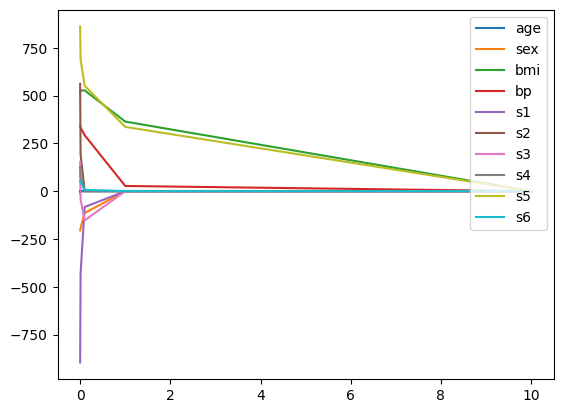

In [22]:
input_array = np.array(coefs).T

plt.plot(alphas, np.zeros(len(alphas)), color='black')
for i in range(input_array.shape[0]):
    plt.plot(alphas, input_array[i], label=data.feature_names[i])
plt.legend(loc='upper right')

# 3. Impact on Bias and Variance

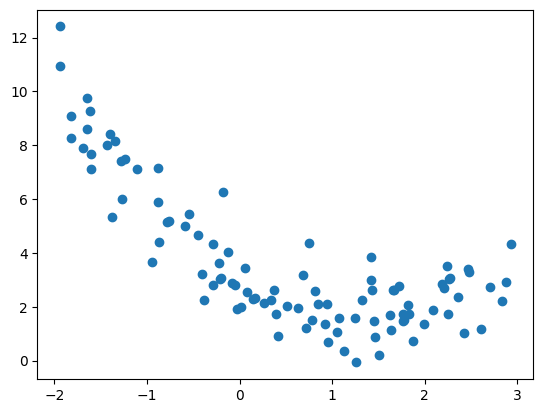

In [25]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [ ]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Lasso(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test,
        loss='mse',
        random_seed=123
    )
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\dhani\new_anaconda 3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+01, tolerance: 4.752e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast

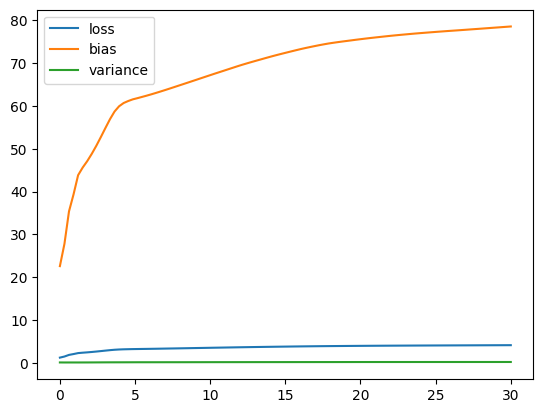

In [33]:
plt.plot(alphas, loss, label='loss')
plt.plot(alphas, bias, label='bias')
plt.plot(alphas, variance, label='variance')
plt.legend()

# 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


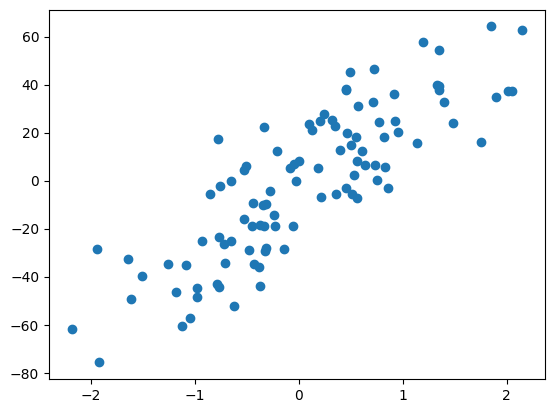

In [35]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20,
                      random_state=13)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [36]:
def cal_loss(m, alpha):
    return np.sum((y - m*X.ravel() + 2.29) ** 2) + alpha*abs(m)

In [37]:
def predict(m):
    return m*X - 2.29

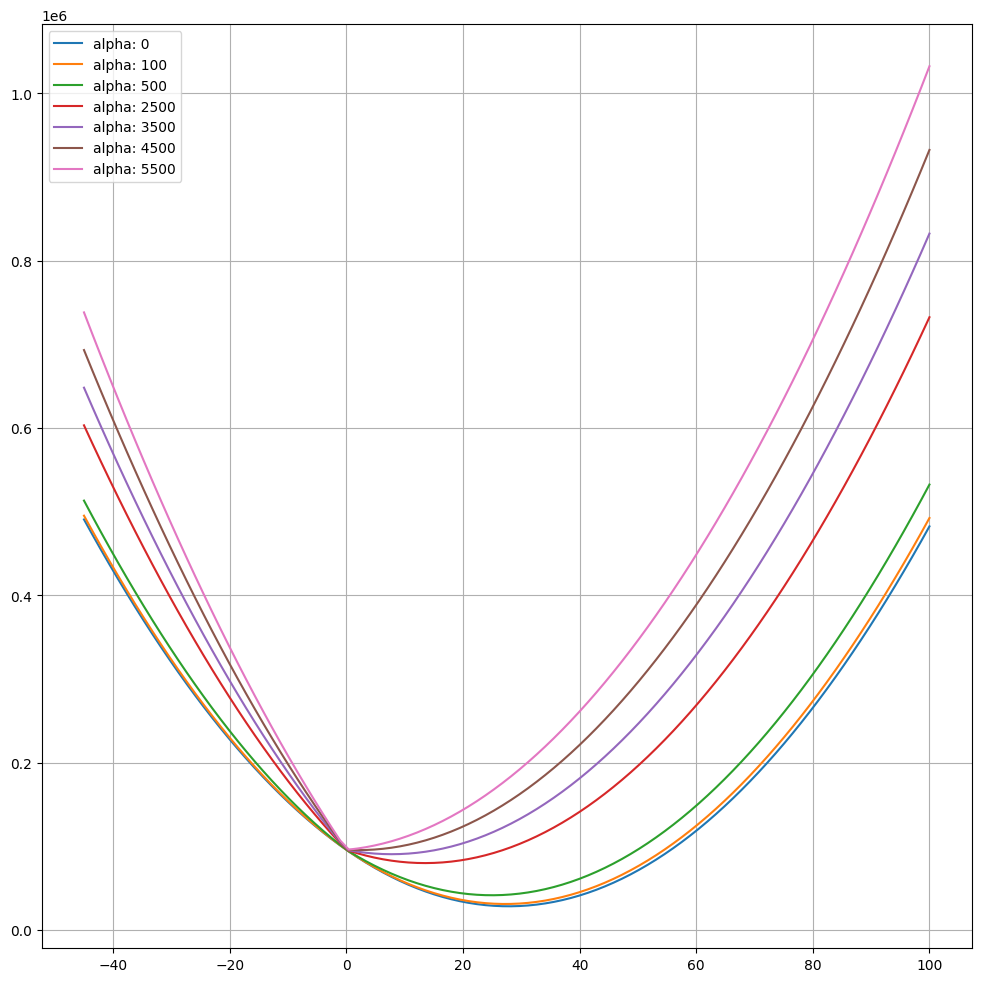

In [41]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(12,12))
for j in [0,100,500,2500,3500,4500,5500]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m, loss, label='alpha: {}'.format(j))
plt.legend()
plt.grid()